In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("../data/raw/loan_dataset_raw.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002531,Male,Yes,1,Graduate,Yes,16667,2250.0,86.0,360.0,1.0,Semiurban,Y
1,LP001641,Male,Yes,1,Graduate,Yes,2178,0.0,66.0,300.0,0.0,Rural,N
2,LP002006,Female,No,0,Graduate,No,2507,0.0,56.0,360.0,1.0,Rural,Y
3,LP002367,Female,No,1,Not Graduate,No,4606,0.0,81.0,360.0,1.0,Rural,N
4,LP002911,Male,Yes,1,Graduate,No,2787,1917.0,146.0,360.0,0.0,Rural,N


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            1300 non-null   object 
 1   Gender             1274 non-null   object 
 2   Married            1297 non-null   object 
 3   Dependents         1258 non-null   object 
 4   Education          1300 non-null   object 
 5   Self_Employed      1237 non-null   object 
 6   ApplicantIncome    1300 non-null   int64  
 7   CoapplicantIncome  1300 non-null   float64
 8   LoanAmount         1234 non-null   float64
 9   Loan_Amount_Term   1268 non-null   float64
 10  Credit_History     1203 non-null   float64
 11  Property_Area      1300 non-null   object 
 12  Loan_Status        1300 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 132.2+ KB


## Handling Missing/NaN values

In [4]:
df.isnull().sum()

Loan_ID               0
Gender               26
Married               3
Dependents           42
Education             0
Self_Employed        63
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           66
Loan_Amount_Term     32
Credit_History       97
Property_Area         0
Loan_Status           0
dtype: int64

### 1. Gender

In [5]:
df['Gender'].value_counts()

Gender
Male      1010
Female     264
Name: count, dtype: int64

Imputing with mode

In [6]:
df.loc[df['Gender'].isnull(), 'Gender'] = 'Male'

In [7]:
df['Gender'].isnull().sum()

np.int64(0)

### 2. Married

In [8]:
df['Married'].value_counts()

Married
Yes    792
No     505
Name: count, dtype: int64

Imputing with mode

In [9]:
df.loc[df['Married'].isnull(), 'Married'] = 'Yes'

In [10]:
df['Married'].isnull().sum()

np.int64(0)

### 3. Dependents

In [11]:
df['Dependents'].value_counts()

Dependents
0     717
1     227
2     179
3+    135
Name: count, dtype: int64

Imputing with mode

In [12]:
df.loc[df['Dependents'].isnull(), 'Dependents'] = '0'

In [13]:
df['Dependents'].isnull().sum()

np.int64(0)

### 4. Self_Employed

In [14]:
df['Self_Employed'].value_counts()

Self_Employed
No     1063
Yes     174
Name: count, dtype: int64

In [15]:
df.loc[df['Self_Employed'].isnull(), 'Self_Employed'] = 'No'

In [16]:
df['Self_Employed'].isnull().sum()

np.int64(0)

### 5. Loan Amount

In [17]:
df['Loan_Amount_Term'].value_counts().count()

np.int64(10)

In [18]:
df['LoanAmount'].describe()

count    1234.000000
mean      155.893031
std        95.034701
min         9.000000
25%       103.000000
50%       128.500000
75%       180.000000
max       700.000000
Name: LoanAmount, dtype: float64

In [19]:
df['LoanAmount'].median()

np.float64(128.5)

In [20]:
df.loc[df['LoanAmount'].isnull(), 'LoanAmount'] = 128

In [21]:
df['LoanAmount'].isnull().sum()

np.int64(0)

### 6. Loan_Amount_Term

In [22]:
df['Loan_Amount_Term'].value_counts().count()

np.int64(10)

In [23]:
df['Loan_Amount_Term'].describe()

count    1268.000000
mean      344.640379
std        62.489121
min        12.000000
25%       360.000000
50%       360.000000
75%       360.000000
max       480.000000
Name: Loan_Amount_Term, dtype: float64

In [24]:
df['Loan_Amount_Term'].median()

np.float64(360.0)

In [25]:
df.loc[df['Loan_Amount_Term'].isnull(), 'Loan_Amount_Term'] = 128

In [26]:
df['Loan_Amount_Term'].isnull().sum()

np.int64(0)

### 7. Credit History

In [27]:
df['Credit_History'].value_counts()

Credit_History
1.0    812
0.0    391
Name: count, dtype: int64

In [28]:
df.loc[df['Credit_History'].isnull(), 'Credit_History'] = 1

In [29]:
df['Credit_History'].isnull().sum()

np.int64(0)

In [30]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Dropping Loan Id

In [31]:
df.drop('Loan_ID', axis=1, inplace=True)

In [32]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,Yes,16667,2250.0,86.0,360.0,1.0,Semiurban,Y
1,Male,Yes,1,Graduate,Yes,2178,0.0,66.0,300.0,0.0,Rural,N
2,Female,No,0,Graduate,No,2507,0.0,56.0,360.0,1.0,Rural,Y
3,Female,No,1,Not Graduate,No,4606,0.0,81.0,360.0,1.0,Rural,N
4,Male,Yes,1,Graduate,No,2787,1917.0,146.0,360.0,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...
1295,Male,No,1,Graduate,No,3062,1987.0,111.0,180.0,0.0,Urban,N
1296,Male,Yes,2,Graduate,Yes,2726,0.0,106.0,360.0,0.0,Semiurban,N
1297,Male,Yes,3+,Graduate,No,5516,11300.0,495.0,360.0,0.0,Semiurban,N
1298,Male,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,N


### Removing Outliers

In [33]:
# prompt: Remove Outliers

# Removing outliers from LoanAmount
Q1 = df['LoanAmount'].quantile(0.25)
Q3 = df['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df = df[df['LoanAmount'] > lower_limit]
df = df[df['LoanAmount'] < upper_limit]

# Removing outliers from ApplicantIncome
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df = df[df['ApplicantIncome'] > lower_limit]
df = df[df['ApplicantIncome'] < upper_limit]

# Removing outliers from CoapplicantIncome
Q1 = df['CoapplicantIncome'].quantile(0.25)
Q3 = df['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df = df[df['CoapplicantIncome'] > lower_limit]
df = df[df['CoapplicantIncome'] < upper_limit]

In [34]:
df.shape

(1072, 12)

In [35]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
categorical_columns = list(df.columns.difference(numerical_columns))

In [36]:
print(numerical_columns)
print(categorical_columns)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
['Credit_History', 'Dependents', 'Education', 'Gender', 'Loan_Status', 'Married', 'Property_Area', 'Self_Employed']


### Skewness

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [38]:
skeweness_measure = {
    "high_pos" : [],
    "moder_pos": [],
    "normal": [],
    "moder_neg": [],
    "high_neg" : []
}

C:\Users\adity\AppData\Local\Temp\ipykernel_607984\2836548941.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[f'{item}'], shade=True)


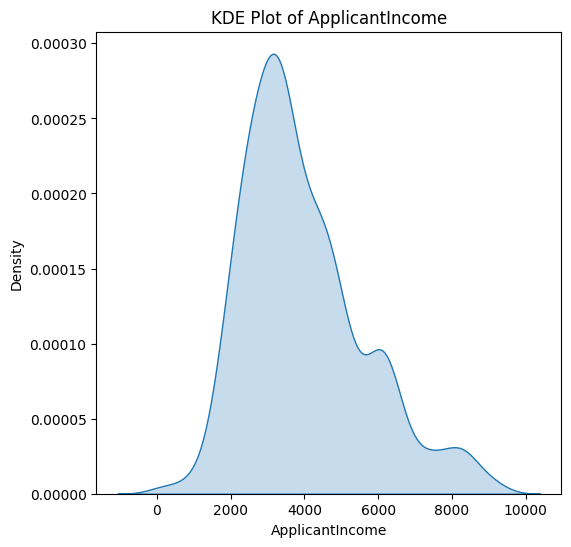

C:\Users\adity\AppData\Local\Temp\ipykernel_607984\2836548941.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[f'{item}'], shade=True)


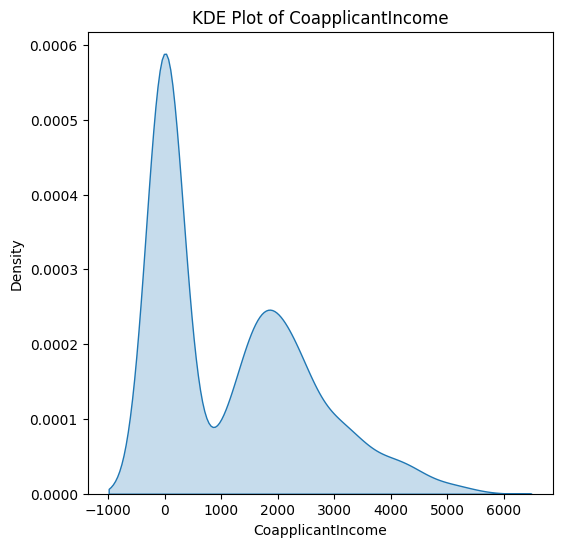

C:\Users\adity\AppData\Local\Temp\ipykernel_607984\2836548941.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[f'{item}'], shade=True)


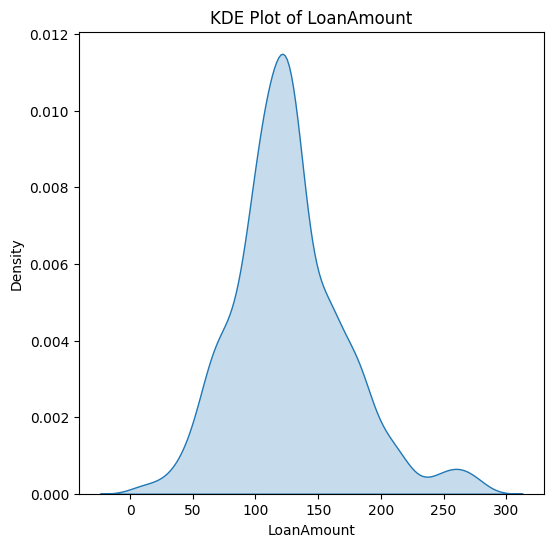

C:\Users\adity\AppData\Local\Temp\ipykernel_607984\2836548941.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[f'{item}'], shade=True)


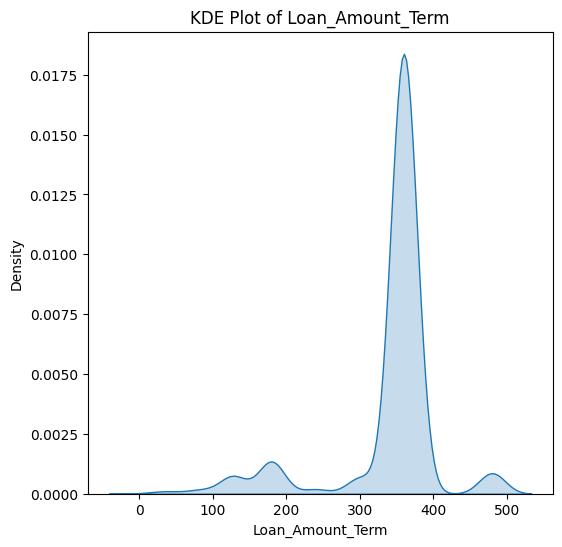

In [39]:
for item in numerical_columns:
    plt.figure(figsize=(6, 6))
    sns.kdeplot(df[f'{item}'], shade=True)
    plt.title(f'KDE Plot of {item}')
    plt.xlabel(f'{item}')
    plt.ylabel('Density')
    plt.show()

In [40]:
for item in numerical_columns:
      print(f'skeweness of {item}: {skew(df[f"{item}"])}')
      if skew(df[f"{item}"]) > 1:
          skeweness_measure["high_pos"].append(item)
      elif skew(df[f"{item}"]) > 0.5 and skew(df[f"{item}"]) <= 1:
          skeweness_measure["moder_pos"].append(item)
      elif skew(df[f"{item}"]) <= 0.5 and skew(df[f"{item}"]) > -0.5:
          skeweness_measure["normal"].append(item)
      elif skew(df[f"{item}"]) <= -0.5 and skew(df[f"{item}"]) > -1:
          skeweness_measure["moder_neg"].append(item)
      elif(skew(df[f"{item}"]) < -1):
          skeweness_measure["high_neg"].append(item)

skeweness of ApplicantIncome: 0.8499414335847174
skeweness of CoapplicantIncome: 0.7911470678966377
skeweness of LoanAmount: 0.6409894478285614
skeweness of Loan_Amount_Term: -1.952319237753653


In [41]:
skeweness_measure

{'high_pos': [],
 'moder_pos': ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'],
 'normal': [],
 'moder_neg': [],
 'high_neg': ['Loan_Amount_Term']}

In [42]:
for item in numerical_columns:
    print(f'Mean of {item} : {df[item].mean()} & Standard Deviation of {item} : {df[item].std()}')

Mean of ApplicantIncome : 3962.25 & Standard Deviation of ApplicantIncome : 1644.8874132416772
Mean of CoapplicantIncome : 1177.4579477505972 & Standard Deviation of CoapplicantIncome : 1336.0257591577229
Mean of LoanAmount : 126.86847014925372 & Standard Deviation of LoanAmount : 44.46747312892384
Mean of Loan_Amount_Term : 339.8880597014925 & Standard Deviation of Loan_Amount_Term : 71.86325435819533


### Feature Transformation

In [43]:
df.loc[df['CoapplicantIncome'] == 0, 'CoapplicantIncome'] = 1

In [44]:
df['ApplicantIncome'] = df['ApplicantIncome'].apply(lambda x: np.sqrt(x))
df['CoapplicantIncome'] = df['CoapplicantIncome'].apply(lambda x: np.log(x))
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].apply(lambda x: np.power(x, 3))

In [45]:
for item in numerical_columns:
      print(f'skeweness of {item}: {skew(df[f"{item}"])}')
      if skew(df[f"{item}"]) > 1:
          skeweness_measure["high_pos"].append(item)
      elif skew(df[f"{item}"]) > 0.5 and skew(df[f"{item}"]) <= 1:
          skeweness_measure["moder_pos"].append(item)
      elif skew(df[f"{item}"]) <= 0.5 and skew(df[f"{item}"]) > -0.5:
          skeweness_measure["normal"].append(item)
      elif skew(df[f"{item}"]) <= -0.5 and skew(df[f"{item}"]) > -1:
          skeweness_measure["moder_neg"].append(item)
      elif(skew(df[f"{item}"]) < -1):
          skeweness_measure["high_neg"].append(item)

skeweness of ApplicantIncome: 0.22375823238307144
skeweness of CoapplicantIncome: -0.04645873074631453
skeweness of LoanAmount: 0.6409894478285614
skeweness of Loan_Amount_Term: 0.6492540039541467


C:\Users\adity\AppData\Local\Temp\ipykernel_607984\2836548941.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[f'{item}'], shade=True)


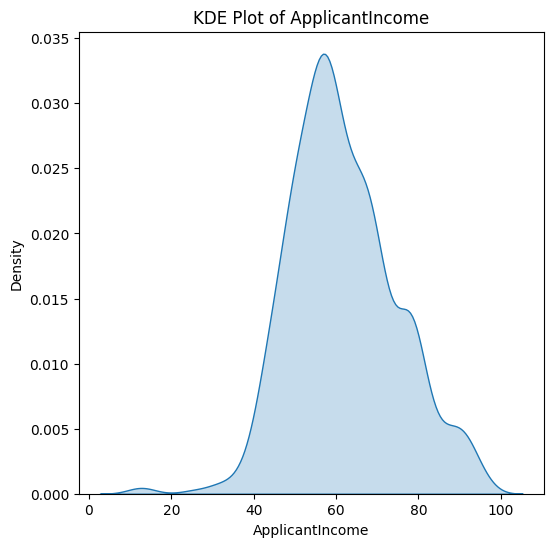

C:\Users\adity\AppData\Local\Temp\ipykernel_607984\2836548941.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[f'{item}'], shade=True)


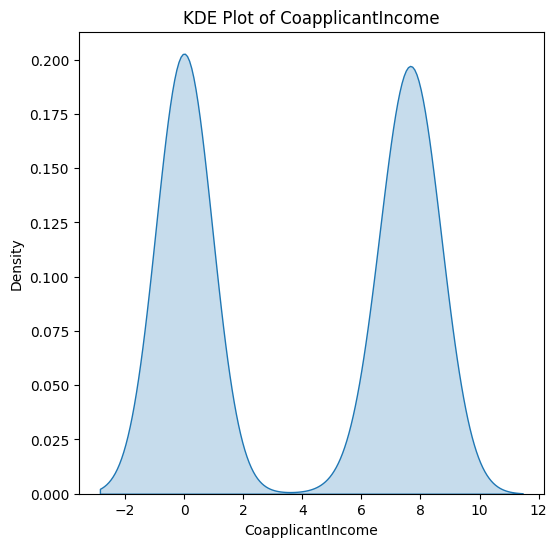

C:\Users\adity\AppData\Local\Temp\ipykernel_607984\2836548941.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[f'{item}'], shade=True)


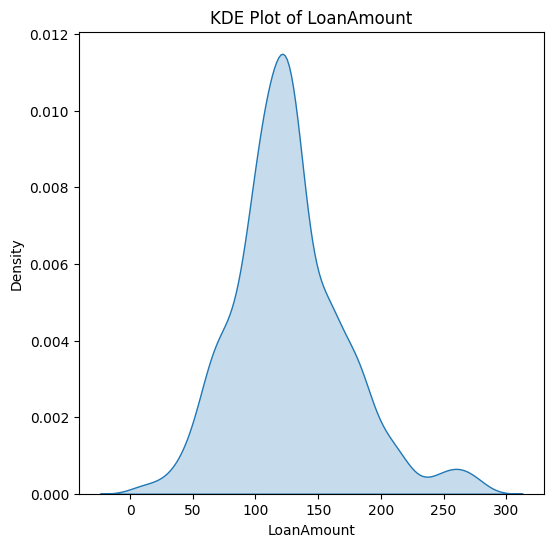

C:\Users\adity\AppData\Local\Temp\ipykernel_607984\2836548941.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[f'{item}'], shade=True)


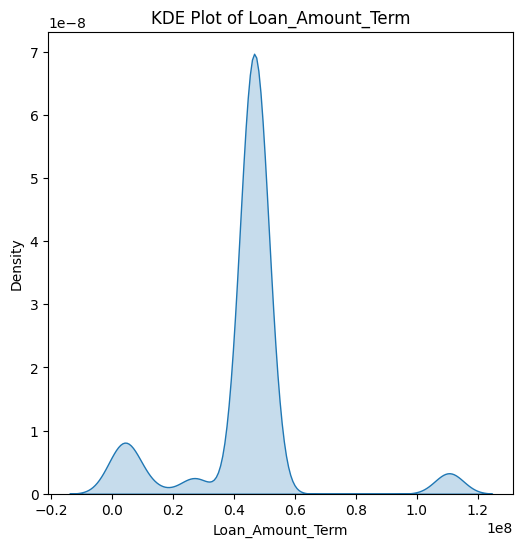

In [46]:
for item in numerical_columns:
    plt.figure(figsize=(6, 6))
    sns.kdeplot(df[f'{item}'], shade=True)
    plt.title(f'KDE Plot of {item}')
    plt.xlabel(f'{item}')
    plt.ylabel('Density')
    plt.show()

In [47]:
for item in numerical_columns:
    print(f'Mean of {item} : {df[item].mean()} & Standard Deviation of {item} : {df[item].std()}')

Mean of ApplicantIncome : 61.613902754994015 & Standard Deviation of ApplicantIncome : 12.889218794887874
Mean of CoapplicantIncome : 3.948071305296548 & Standard Deviation of CoapplicantIncome : 3.8297240846325677
Mean of LoanAmount : 126.86847014925372 & Standard Deviation of LoanAmount : 44.46747312892384
Mean of Loan_Amount_Term : 43802617.67164179 & Standard Deviation of Loan_Amount_Term : 18952008.18413969


## Feature Scaling

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,Yes,-1.160026,-1.031383,-1.369470,-0.887002,0.0,Rural,N
2,Female,No,0,Graduate,No,-0.896047,-1.031383,-1.594459,0.150629,1.0,Rural,Y
3,Female,No,1,Not Graduate,No,0.485408,-1.031383,-1.031988,0.150629,1.0,Rural,N
4,Male,Yes,1,Graduate,No,-0.684756,0.943183,0.430437,0.150629,0.0,Rural,N
6,Male,Yes,0,Not Graduate,No,-0.478937,0.926732,-0.087036,0.150629,0.0,Semiurban,N


In [49]:
for item in numerical_columns:
    print(f'Mean of {item} : {df[item].mean()} & Standard Deviation of {item} : {df[item].std()}')

Mean of ApplicantIncome : -3.5129444958288533e-16 & Standard Deviation of ApplicantIncome : 1.0004667444828237
Mean of CoapplicantIncome : 9.279476026717726e-17 & Standard Deviation of CoapplicantIncome : 1.0004667444828237
Mean of LoanAmount : 1.623908304675602e-16 & Standard Deviation of LoanAmount : 1.000466744482824
Mean of Loan_Amount_Term : 4.681164245620996e-17 & Standard Deviation of Loan_Amount_Term : 1.0004667444828235


# Analyzing Categorical Columns

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
print(categorical_columns)

['Credit_History', 'Dependents', 'Education', 'Gender', 'Loan_Status', 'Married', 'Property_Area', 'Self_Employed']


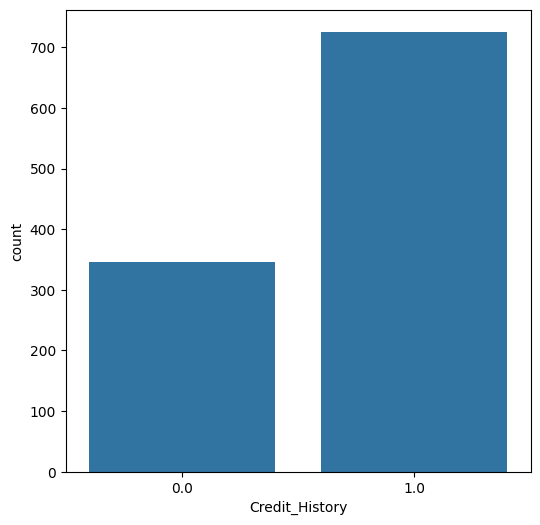

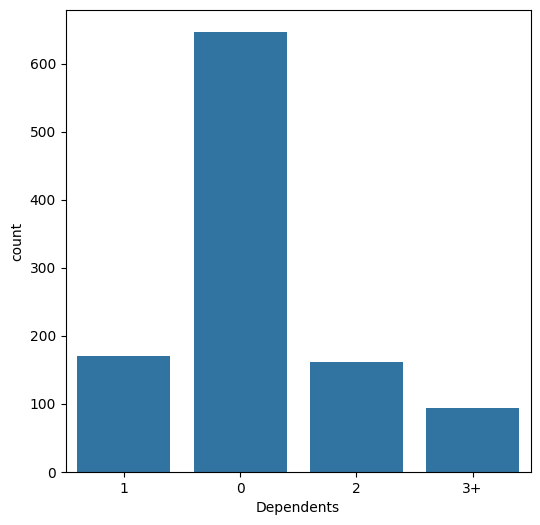

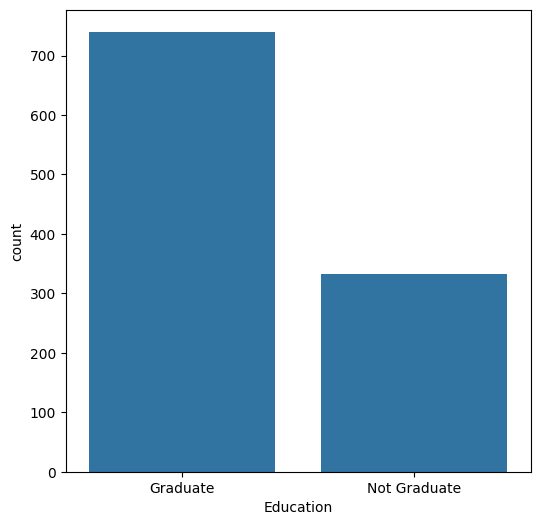

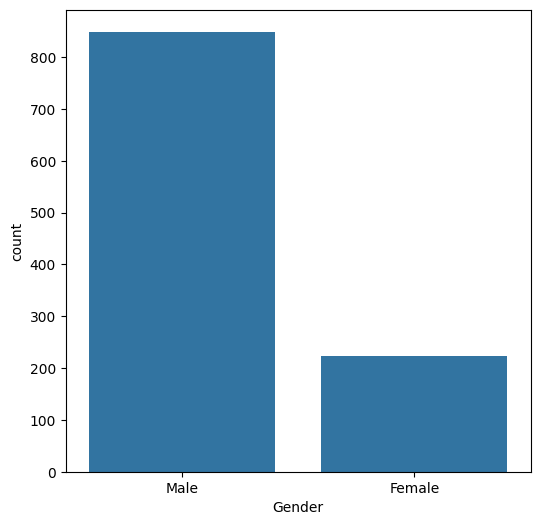

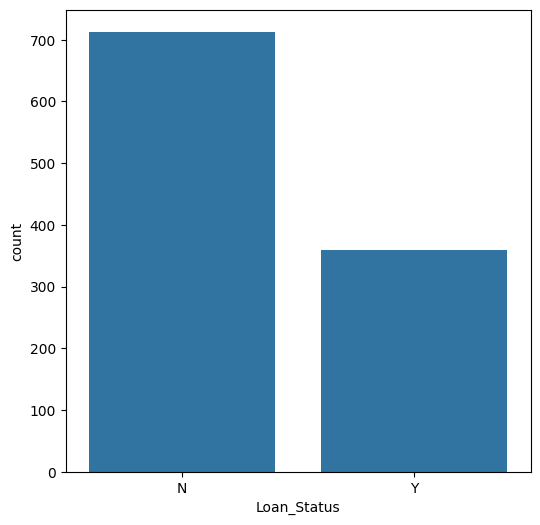

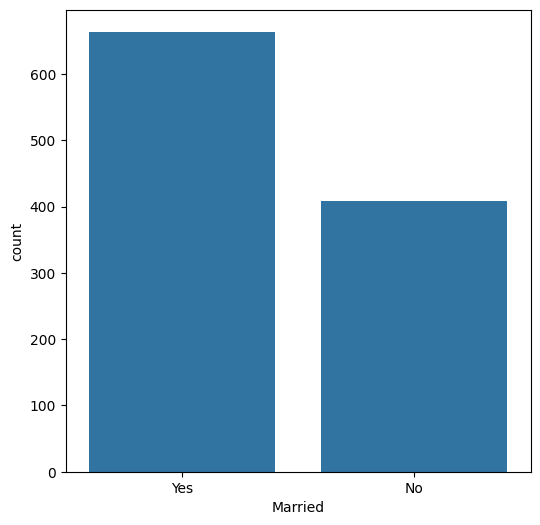

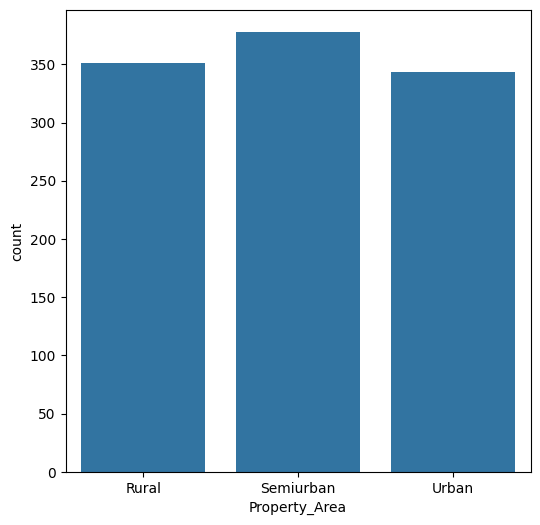

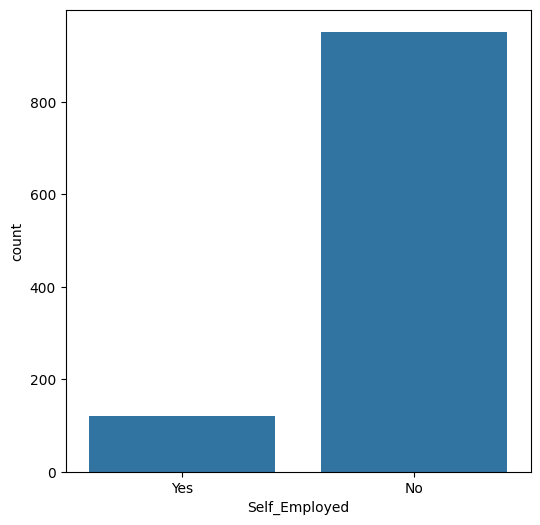

In [52]:
for item in categorical_columns:
    plt.figure(figsize=(6, 6))
    sns.countplot(data=df, x=f'{item}')

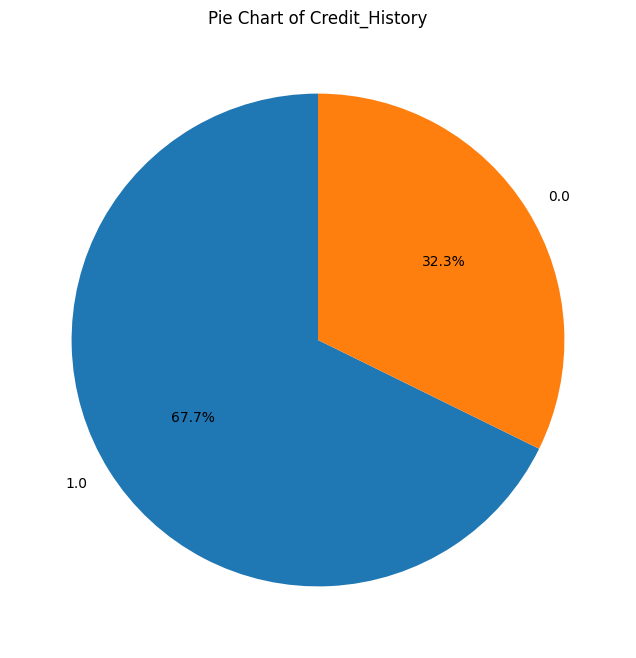

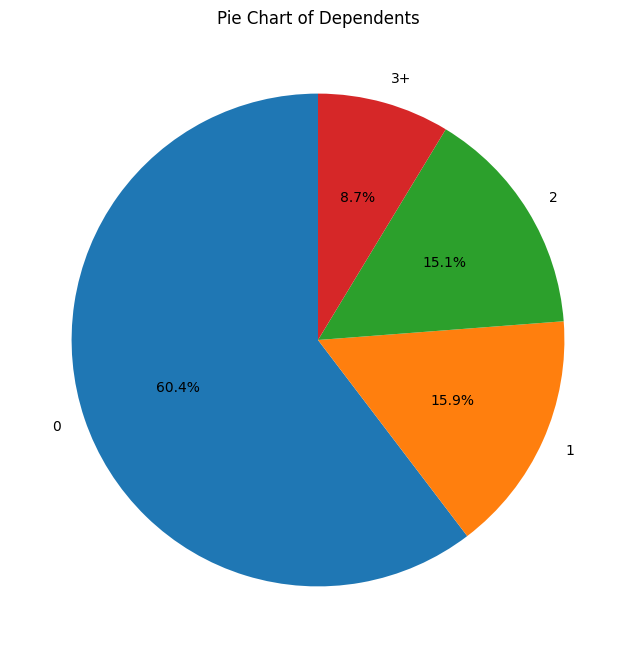

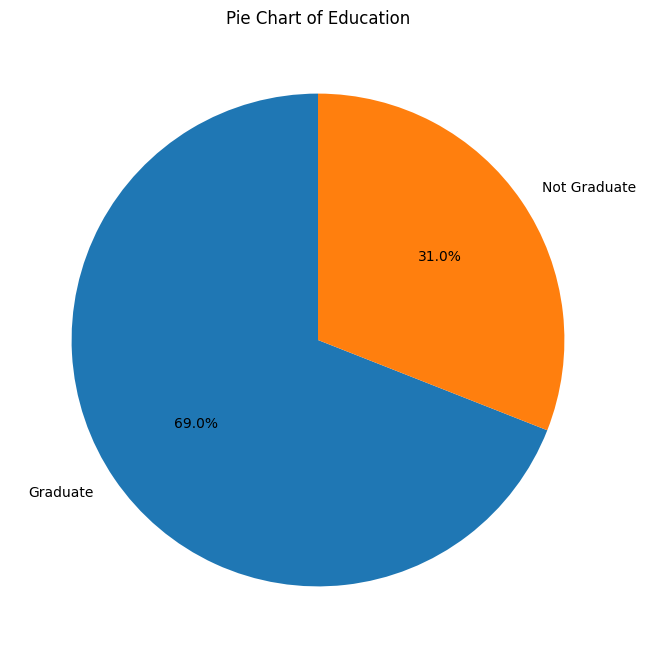

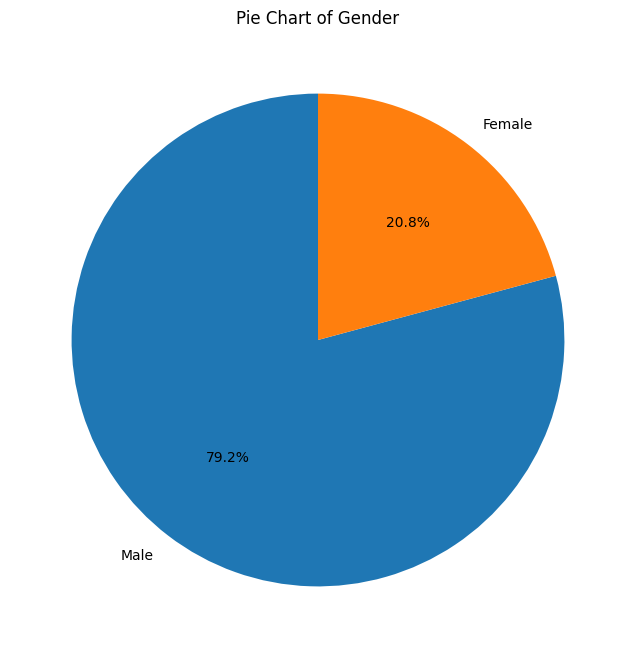

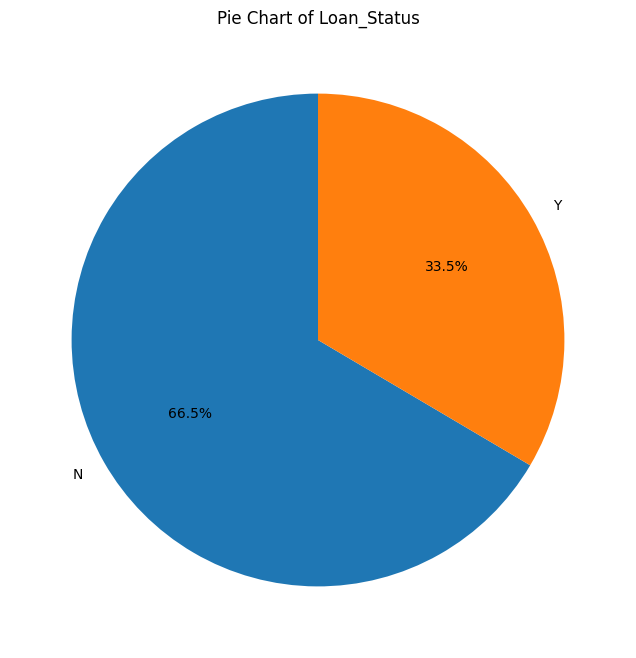

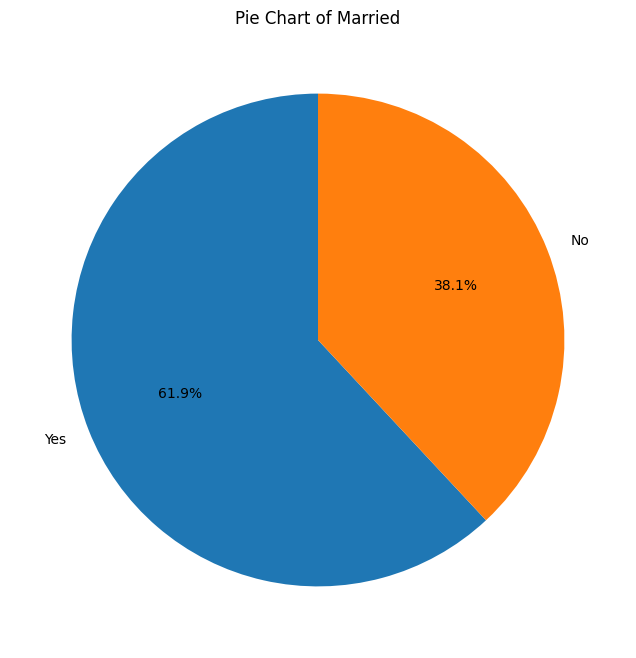

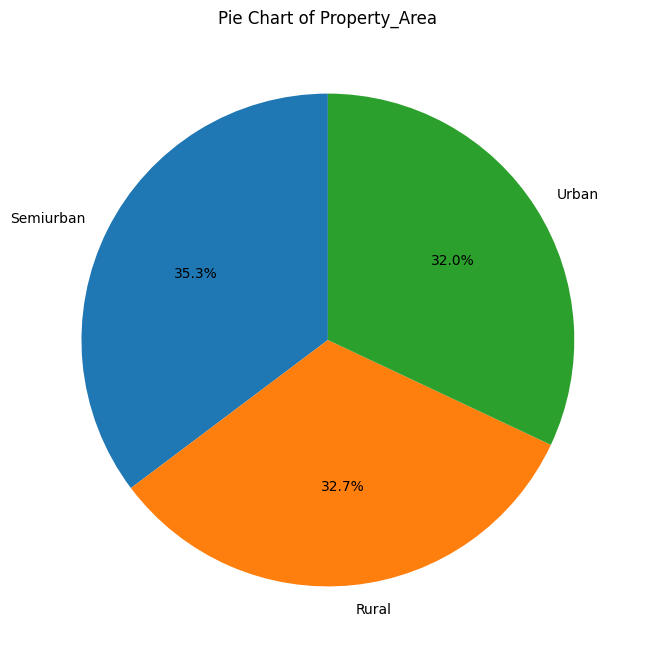

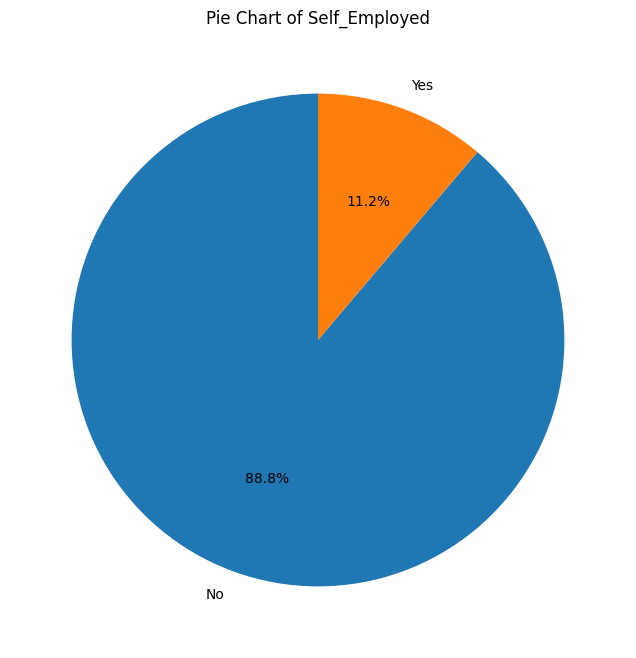

In [53]:
for item in categorical_columns:
    plt.figure(figsize=(8, 8))
    df[item].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart of {item}')
    plt.ylabel('')
    plt.show()

### Encoding Categorical Columns

In [54]:
cat_cols = {
    "target" : ['Loan_Status'],
    "ordinal" : ['Dependents'],
    "nominal" : ['Credit_History','Education','Gender','Married','Property_area','Self_Employed']
}

In [55]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [56]:
# Label Encoding for the target column
label_encoder = LabelEncoder()
df['Loan_Status'] = label_encoder.fit_transform(df['Loan_Status'])

print("\nAfter Label Encoding Target Column:\n", df[['Loan_Status']])



After Label Encoding Target Column:
       Loan_Status
1               0
2               1
3               0
4               0
6               0
...           ...
1293            1
1295            0
1296            0
1298            0
1299            0

[1072 rows x 1 columns]


In [57]:
# Define ordinal order for 'Dependents'
ordinal_mapping = [['0', '1', '2', '3+']]

# Apply Ordinal Encoding
ordinal_encoder = OrdinalEncoder(categories=ordinal_mapping)
df['Dependents'] = ordinal_encoder.fit_transform(df[['Dependents']])

print("\nAfter Ordinal Encoding:\n", df[['Dependents']])


After Ordinal Encoding:
       Dependents
1            1.0
2            0.0
3            1.0
4            1.0
6            0.0
...          ...
1293         0.0
1295         1.0
1296         2.0
1298         0.0
1299         2.0

[1072 rows x 1 columns]


In [58]:
# Nominal columns
nominal_cols = ['Credit_History', 'Education', 'Gender', 'Married', 'Property_Area', 'Self_Employed']

# Apply One-Hot Encoding
df_nominal_encoded = pd.get_dummies(df[nominal_cols], drop_first=True)

# Concatenate encoded columns back to the original DataFrame
df = pd.concat([df.drop(columns=nominal_cols), df_nominal_encoded], axis=1)

print("\nAfter One-Hot Encoding:\n", df.head())


After One-Hot Encoding:
    Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
1         1.0        -1.160026          -1.031383   -1.369470   
2         0.0        -0.896047          -1.031383   -1.594459   
3         1.0         0.485408          -1.031383   -1.031988   
4         1.0        -0.684756           0.943183    0.430437   
6         0.0        -0.478937           0.926732   -0.087036   

   Loan_Amount_Term  Loan_Status  Credit_History  Education_Not Graduate  \
1         -0.887002            0             0.0                   False   
2          0.150629            1             1.0                   False   
3          0.150629            0             1.0                    True   
4          0.150629            0             0.0                   False   
6          0.150629            0             0.0                    True   

   Gender_Male  Married_Yes  Property_Area_Semiurban  Property_Area_Urban  \
1         True         True                    Fa

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1072 entries, 1 to 1299
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               1072 non-null   float64
 1   ApplicantIncome          1072 non-null   float64
 2   CoapplicantIncome        1072 non-null   float64
 3   LoanAmount               1072 non-null   float64
 4   Loan_Amount_Term         1072 non-null   float64
 5   Loan_Status              1072 non-null   int64  
 6   Credit_History           1072 non-null   float64
 7   Education_Not Graduate   1072 non-null   bool   
 8   Gender_Male              1072 non-null   bool   
 9   Married_Yes              1072 non-null   bool   
 10  Property_Area_Semiurban  1072 non-null   bool   
 11  Property_Area_Urban      1072 non-null   bool   
 12  Self_Employed_Yes        1072 non-null   bool   
dtypes: bool(6), float64(6), int64(1)
memory usage: 73.3 KB


In [60]:
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Credit_History,Education_Not Graduate,Gender_Male,Married_Yes,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_Yes
1,1.0,-1.160026,-1.031383,-1.369470,-0.887002,0,0.0,False,True,True,False,False,True
2,0.0,-0.896047,-1.031383,-1.594459,0.150629,1,1.0,False,False,False,False,False,False
3,1.0,0.485408,-1.031383,-1.031988,0.150629,0,1.0,True,False,False,False,False,False
4,1.0,-0.684756,0.943183,0.430437,0.150629,0,0.0,False,True,True,False,False,False
6,0.0,-0.478937,0.926732,-0.087036,0.150629,0,0.0,True,True,True,True,False,False


## Train Test Split

In [61]:
from sklearn.model_selection import train_test_split
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(857, 12) (215, 12) (857,) (215,)


## Decision Trees

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9302325581395349
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       141
           1       0.94      0.85      0.89        74

    accuracy                           0.93       215
   macro avg       0.93      0.91      0.92       215
weighted avg       0.93      0.93      0.93       215

[[137   4]
 [ 11  63]]


In [63]:
# prompt: Compare different ml classification techniques and compare them find the best suitable model among them based on precision and f1 score

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


# ... (Your existing code for data preprocessing) ...

# Assuming X and y are already defined as in your original code
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),  # You can tune hyperparameters here
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000) # Increased max_iter
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = {
        "accuracy": accuracy,
        "precision": precision,
        "f1_score": f1
    }
    print(f"---{name}---")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"F1 Score: {f1}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

# Compare and find the best model
best_model = max(results, key=lambda k: results[k]["f1_score"])
print(f"\nBest Model based on F1-Score: {best_model}")
print(f"F1-Score: {results[best_model]['f1_score']}")
print(f"Precision: {results[best_model]['precision']}")

---Decision Tree---
Accuracy: 0.9302325581395349
Precision: 0.9402985074626866
F1 Score: 0.8936170212765957
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       141
           1       0.94      0.85      0.89        74

    accuracy                           0.93       215
   macro avg       0.93      0.91      0.92       215
weighted avg       0.93      0.93      0.93       215

[[137   4]
 [ 11  63]]
---Random Forest---
Accuracy: 0.9209302325581395
Precision: 0.9253731343283582
F1 Score: 0.8794326241134752
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       141
           1       0.93      0.84      0.88        74

    accuracy                           0.92       215
   macro avg       0.92      0.90      0.91       215
weighted avg       0.92      0.92      0.92       215

[[136   5]
 [ 12  62]]
---SVM---
Accuracy: 0.8093023255813954
Precision: 0.7894736842105263
F1 Score: 0.687

## So we select Decision Trees

*   Best Model based on F1-Score: Decision Tree
*   F1-Score: 0.8936170212765957
*   Precision: 0.9402985074626866

In [64]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_classifier = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='f1') # Use f1 scoring
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best F1-score:", grid_search.best_score_)


best_dt_classifier = grid_search.best_estimator_
y_pred = best_dt_classifier.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\n---Tuned Decision Tree---")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Best hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best F1-score: 0.8198769634931196

---Tuned Decision Tree---
Accuracy: 0.9302325581395349
Precision: 0.9402985074626866
F1 Score: 0.8936170212765957
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       141
           1       0.94      0.85      0.89        74

    accuracy                           0.93       215
   macro avg       0.93      0.91      0.92       215
weighted avg       0.93      0.93      0.93       215

[[137   4]
 [ 11  63]]
